In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [2]:
train=pd.read_csv("C:/Users/Jothy Natarajan/Downloads/train.csv")
test=pd.read_csv("C:/Users/Jothy Natarajan/Downloads/test.csv")

In [3]:
train.shape

(550068, 12)

In [4]:
test.shape

(233599, 11)

In [5]:
train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

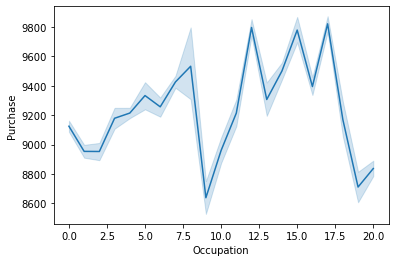

In [6]:
sns.lineplot(x='Occupation',y='Purchase',data=train)

In [7]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [8]:
y=train.Purchase

In [9]:
train=train.drop("Purchase",axis=1)

In [10]:
data=pd.concat([train,test], ignore_index=True)

In [11]:
data.shape

(783667, 11)

In [12]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
dtype: int64

In [13]:
data.isnull().mean()

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.313886
Product_Category_3            0.696481
dtype: float64

In [14]:
data.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [15]:
data.Product_Category_2.fillna("others",inplace=True)

In [16]:
'''data = data.astype({"Occupation": str}, errors='ignore') 
data = data.astype({"Product_Category_1": str}, errors='ignore')
data = data.astype({"Marital_Status": str}, errors='ignore')'''

'data = data.astype({"Occupation": str}, errors=\'ignore\') \ndata = data.astype({"Product_Category_1": str}, errors=\'ignore\')\ndata = data.astype({"Marital_Status": str}, errors=\'ignore\')'

In [17]:
data.drop(["User_ID","Product_ID","Product_Category_3","City_Category","Stay_In_Current_City_Years"],axis=1,inplace=True)

In [18]:
data.head(5)

,Gender,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2
0,F,0-17,10,0,3,others
1,F,0-17,10,0,1,6.0
2,F,0-17,10,0,12,others
3,F,0-17,10,0,12,14.0
4,M,55+,16,0,8,others


In [19]:
data.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [20]:
data

,Gender,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2
0,F,0-17,10,0,3,others
1,F,0-17,10,0,1,6.0
2,F,0-17,10,0,12,others
3,F,0-17,10,0,12,14.0
4,M,55+,16,0,8,others
...,...,...,...,...,...,...
783662,F,26-35,15,1,8,others
783663,F,26-35,15,1,5,8.0
783664,F,26-35,15,1,1,5.0
783665,F,46-50,1,0,10,16.0


In [21]:
data=pd.get_dummies(data)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(data)
scaled_data=scaler.transform(data)

In [23]:
x1= pd.DataFrame(scaled_data)
x=x1.iloc[:550068]
Test=x1.iloc[550068:]

In [24]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size = 0.8, test_size = 0.2,random_state =50)

In [26]:
model5 = XGBRegressor().fit(x_train, y_train)
y_predicted6=model5.predict(x_test)
print("Score=",model5.score(x_test,y_test))
print("RMSE",mean_squared_error(y_test,y_predicted6,squared=False))

Score= 0.6508549335463371
RMSE 2971.024588617035


In [27]:
y_result = model5.predict(Test)
Y=pd.DataFrame(y_result)

In [28]:
result=pd.concat([Y,test.User_ID,test.Product_ID],axis=1)
result.rename(columns={0:'Purchase'}, inplace=True,)

In [29]:
result.head(5)

,Purchase,User_ID,Product_ID
0,14227.100586,1000004,P00128942
1,11070.390625,1000009,P00113442
2,6307.850586,1000010,P00288442
3,2513.021973,1000010,P00145342
4,2385.577148,1000011,P00053842


In [30]:
result.to_csv('D:/Work Space/BLK.csv',index= False)